# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("../db.sqlite3")

query = '''
SELECT *
FROM restaurant_orderitem
JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
'''

df = pd.read_sql_query(query, conn)

df.to_csv('combined_data.csv', index=False)

df = pd.read_csv('combined_data.csv')

print(len(df)) 

74818


,id,quantity,order_id,product_id,id.1,price,name,id.2,datetime
0,1,2,1,6,6,0.80,Plain Papadum,1,2019-08-03 20:25:00
1,2,1,1,240,240,12.95,King Prawn Balti,1,2019-08-03 20:25:00
2,3,1,1,19,19,2.95,Garlic Naan,1,2019-08-03 20:25:00
3,4,1,1,36,36,3.95,Mushroom Rice,1,2019-08-03 20:25:00
4,5,1,1,111,111,8.95,Paneer Tikka Masala,1,2019-08-03 20:25:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

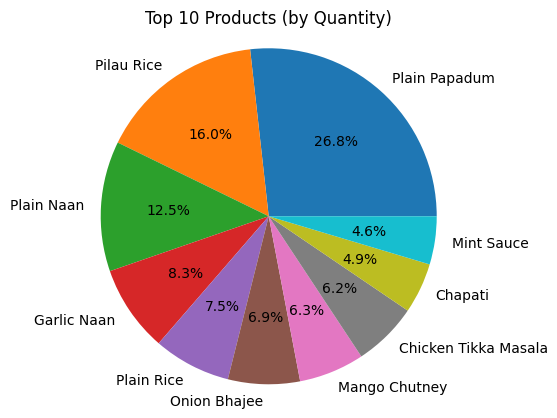

,id,quantity,order_id,product_id,id.1,price,name,id.2,datetime
0,1,2,1,6,6,0.80,Plain Papadum,1,2019-08-03 20:25:00
1,2,1,1,240,240,12.95,King Prawn Balti,1,2019-08-03 20:25:00
2,3,1,1,19,19,2.95,Garlic Naan,1,2019-08-03 20:25:00
3,4,1,1,36,36,3.95,Mushroom Rice,1,2019-08-03 20:25:00
4,5,1,1,111,111,8.95,Paneer Tikka Masala,1,2019-08-03 20:25:00


In [6]:
import matplotlib.pyplot as plt

product_sales = df.groupby('name')['quantity'].sum()
top_10_products = product_sales.nlargest(10)

plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%')
plt.title('Top 10 Products (by Quantity)')
plt.axis('equal')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

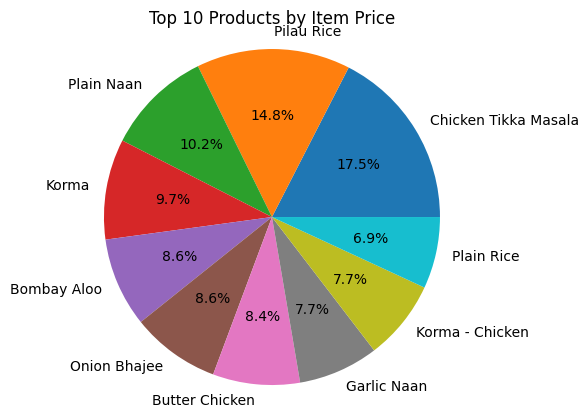

,id,quantity,order_id,product_id,id.1,price,name,id.2,datetime,Item Price
0,1,2,1,6,6,0.80,Plain Papadum,1,2019-08-03 20:25:00,1.60
1,2,1,1,240,240,12.95,King Prawn Balti,1,2019-08-03 20:25:00,12.95
2,3,1,1,19,19,2.95,Garlic Naan,1,2019-08-03 20:25:00,2.95
3,4,1,1,36,36,3.95,Mushroom Rice,1,2019-08-03 20:25:00,3.95
4,5,1,1,111,111,8.95,Paneer Tikka Masala,1,2019-08-03 20:25:00,8.95


In [8]:
df['Item Price'] = df['price'] * df['quantity']

product_prices = df.groupby('name')['Item Price'].sum()

top_10_products = product_prices.nlargest(10)

plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%')
plt.title('Top 10 Products by Item Price')
plt.axis('equal')
plt.show()
df.head()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

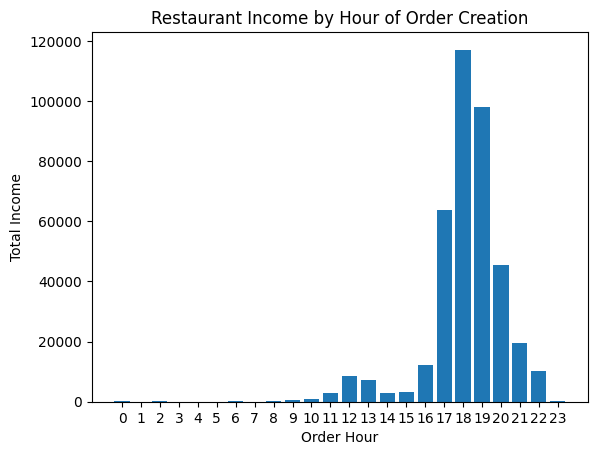

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Order Hour'] = df['datetime'].dt.hour

hourly_income = df.groupby('Order Hour')['price'].sum()

plt.bar(hourly_income.index, hourly_income)
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.title('Restaurant Income by Hour of Order Creation')
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

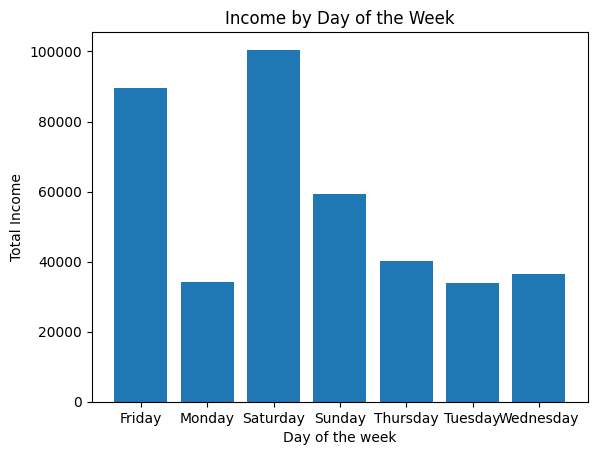

In [18]:
df['Day of the week'] = df['datetime'].dt.dayofweek

day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day of the week'] = df['Day of the week'].map(day_of_week_mapping)

daily_income = df.groupby('Day of the week')['price'].sum()

plt.bar(daily_income.index, daily_income)
plt.xlabel('Day of the week')
plt.ylabel('Total Income')
plt.title('Income by Day of the Week')
plt.show()